🧱 1️.Import Libraries and Load Data

In [19]:
# BMW Car Sales Analysis

# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Download dataset (first time only — cached afterwards)
path = kagglehub.dataset_download("sumedh1507/bmw-car-sales-dataset")

# Load dataset
df = pd.read_csv(path + '/BMW_Car_Sales_Classification.csv')

df.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


📊 2️.Data Overview and Cleaning

In [11]:
# Basic info
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())

# Handle duplicates
df.drop_duplicates(inplace=True)

# Quick summary statistics
df.describe().T


Dataset shape: (50000, 11)

Column names: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

Missing values per column:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Year,50000.0,2017.01570,4.324459,2010.0,2013.00,2017.0,2021.00,2024.0
Engine_Size_L,50000.0,3.24718,1.009078,1.5,2.40,3.2,4.10,5.0
Mileage_KM,50000.0,100307.20314,57941.509344,3.0,50178.00,100388.5,150630.25,199996.0
Price_USD,50000.0,75034.60090,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,5067.51468,2856.767125,100.0,2588.00,5087.0,7537.25,9999.0


Data Visualization

📈 3.Distribution of Numerical Features

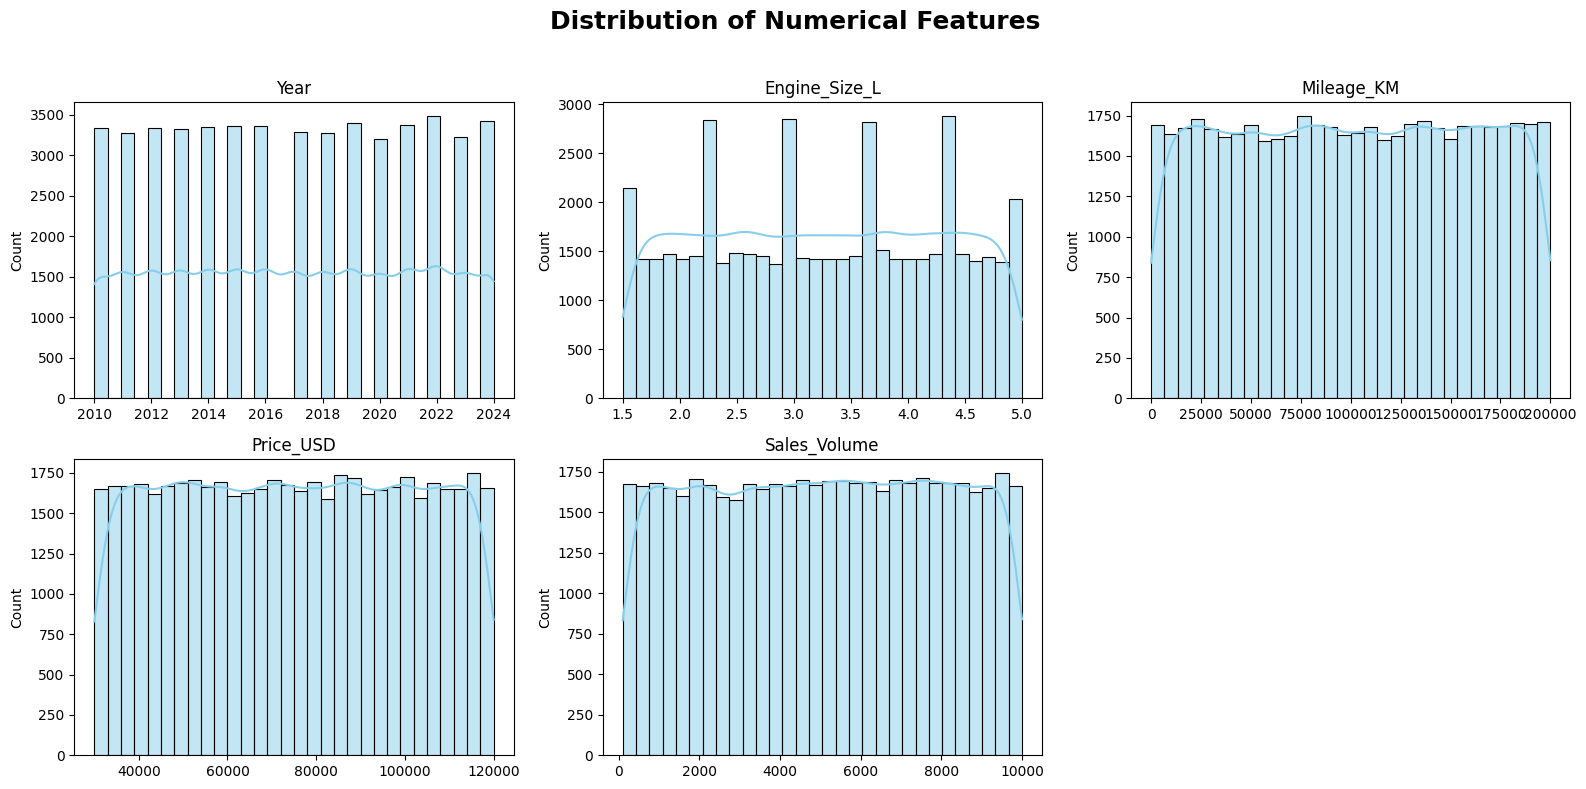

In [12]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Decide grid size based on number of numeric columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a big shared title
fig.suptitle('Distribution of Numerical Features', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # make space for suptitle
plt.show()


🧩 4.Distribution of Categorical Features

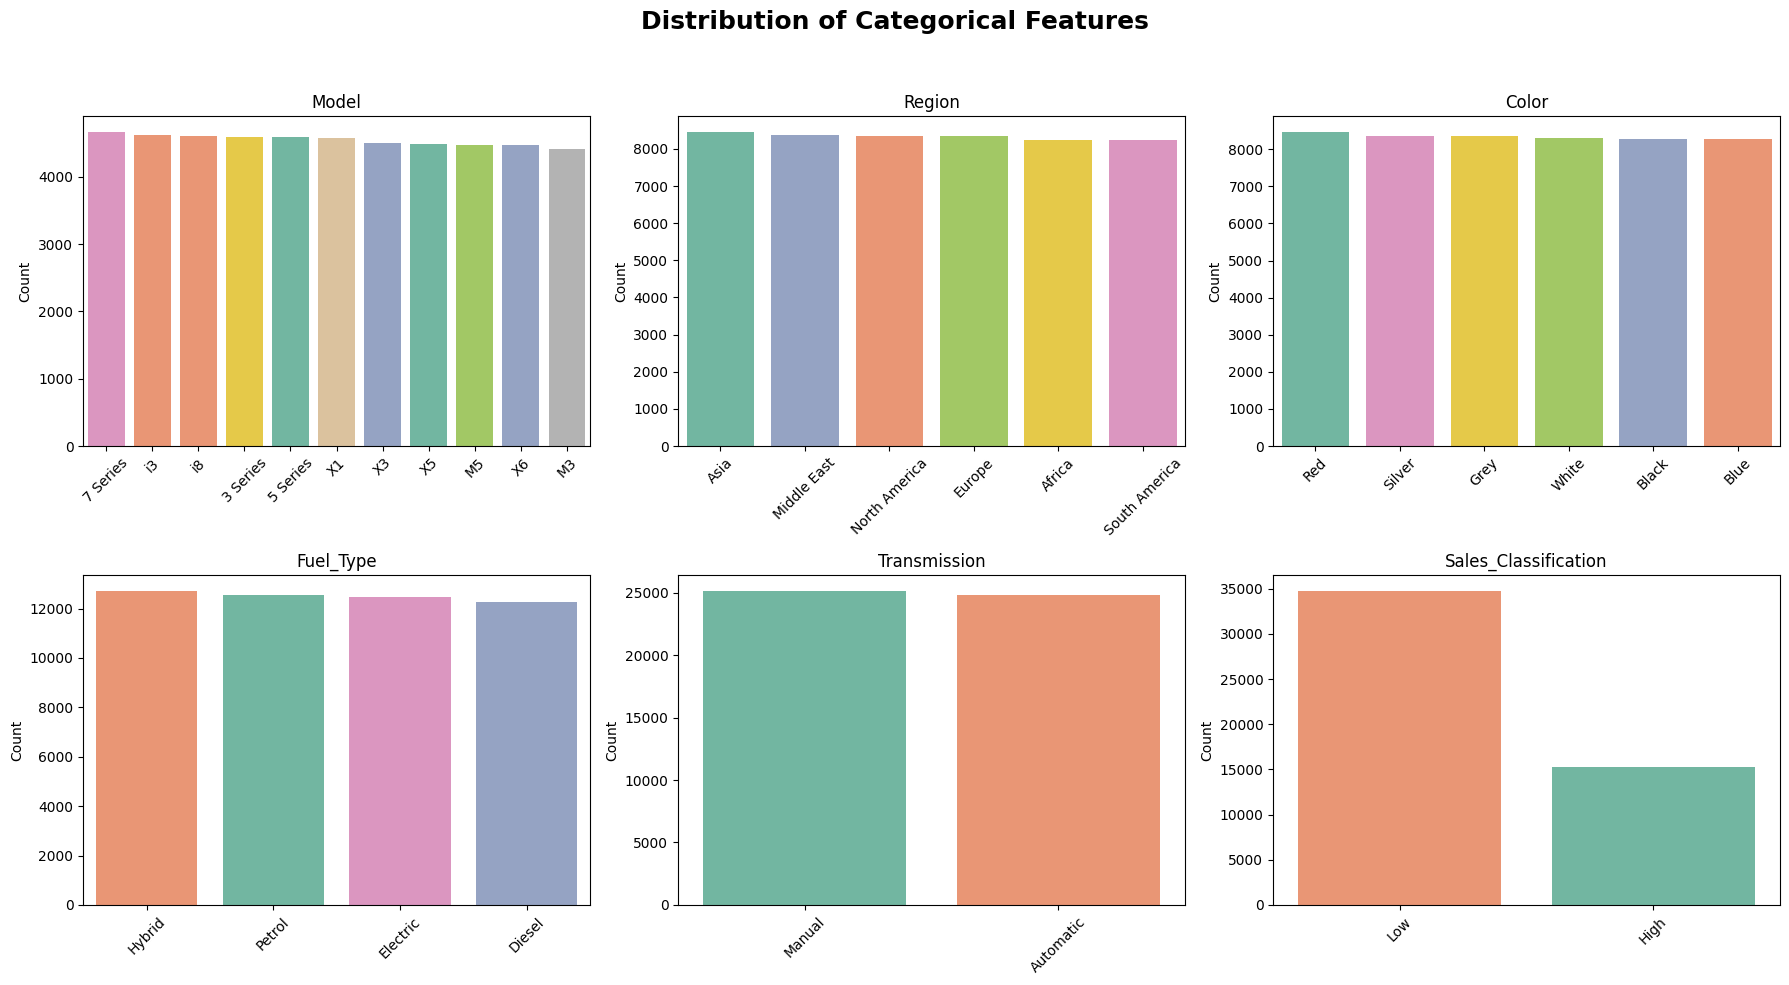

In [13]:
# Select categorical columns
cat_col = df.select_dtypes(include='object').columns

# Define grid layout
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cat_col) / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_col):
    sns.countplot(
        data=df,
        x=col,
        hue= col,
        order=df[col].value_counts().index,  # sort by frequency
        palette='Set2',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots (if total < grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one shared title
fig.suptitle('Distribution of Categorical Features', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


5. Exploratory Data analysis (EDA)

📅 Yearly sales analysis

Q: What are the overall BMW sales trend over the years?

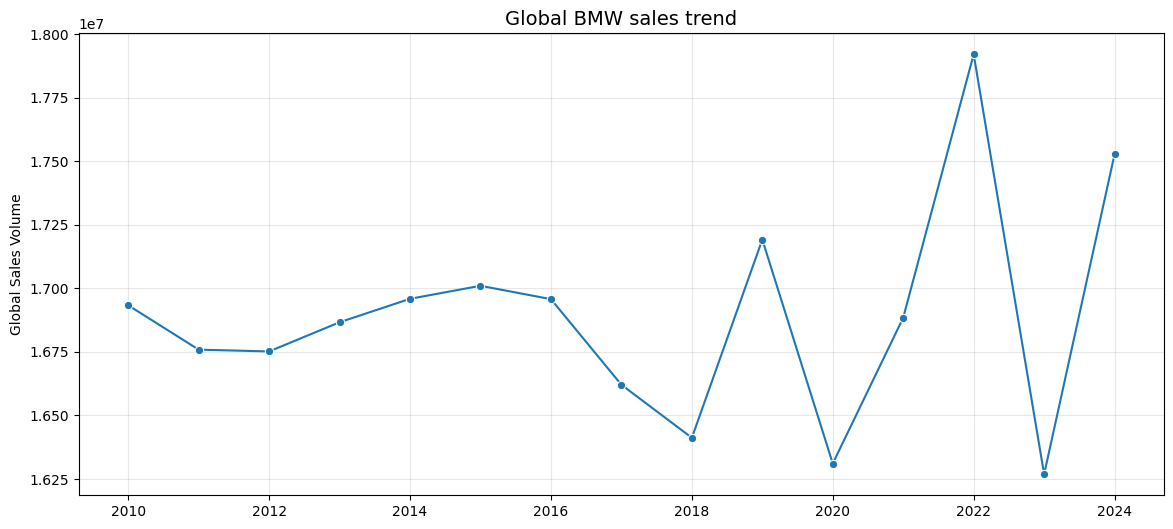

In [14]:
# Global trend
sum_sales_by_year = df.groupby('Year')['Sales_Volume'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,6))

sns.lineplot(data=sum_sales_by_year, 
             x='Year', 
             y='Sales_Volume', 
             marker='o'
             )

plt.title('Global BMW sales trend', fontsize= 14)
plt.xlabel('')
plt.ylabel('Global Sales Volume')
plt.grid(True, alpha=0.3)
# plt.show()



Insight:

-The BMW sales stayed relatively constant during the first couple year from 2010 to 2016. Small fluktuation in the years between 2018 to 2020, with increasing gap and peaking at 2022 and falling of by the year 2023.

Regional analysis

What are the total and average sales volume and price for different regions?

In [15]:
region_analysis = df.groupby('Region').agg({'Sales_Volume': 'sum', 'Price_USD': 'mean'}).sort_values('Sales_Volume', ascending=False).rename(columns={'Sales_Volume': 'Total_Sales_Volume', 'Price_USD': 'Avg_Price_USD'})
print(region_analysis) 

               Total_Sales_Volume  Avg_Price_USD
Region                                          
Asia                     42974277   75554.925006
Europe                   42555138   74988.356851
North America            42402629   75070.054709
Middle East              42326620   74726.788487
Africa                   41565252   74885.771598
South America            41551818   74973.598837


Conclusion:
-Based on the data, Asia leads with the highest total sales volume, closely followed by Europe and North America.
-Although the differences in average price USD are small, Asia maintain the highest average Price, indicating strong sales volume and pricing.
-The middle East, Africa and South America slightly lower sales volumes and similiar average prices, indicating more moderate but steady market performance.
-Overall, the global distribution of BMW sales appears relatively balanced, with Asia showing a slight edge in both scales and price level.

Top BMW models analysis
Q: What are the top selling BMW models?

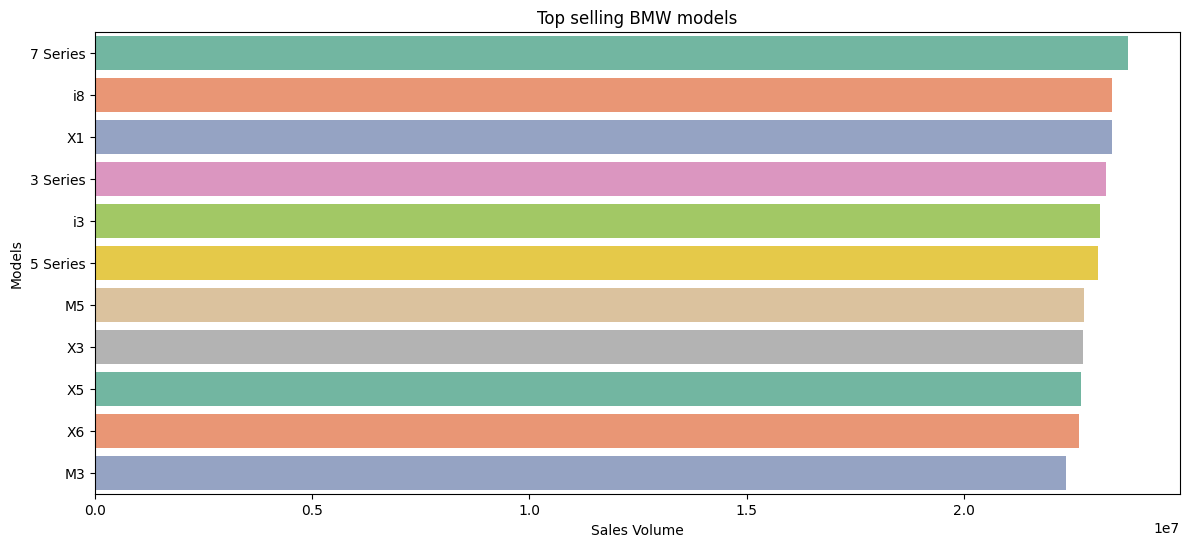

In [16]:
# Top model analysis

top_models = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).reset_index()

# Visualization

plt.figure(figsize=(14,6))

sns.barplot(data=top_models,
            y='Model',
            x='Sales_Volume',
            hue= 'Model',
            palette='Set2',
            legend=False
            )

plt.title('Top selling BMW models')
plt.ylabel('Models')
plt.xlabel('Sales Volume')
plt.show()

Conclusion
-The ranking of BMW’s top-selling models reveals patterns in customer preferences. The 7 Series leads as the best-selling model, highlighting strong demand for luxury, comfort, and advanced features. It is followed by the i8 and the X1 Series, indicating notable interest in BMW’s performance-oriented hybrid sports models as well as compact SUVs.

-At the lower end of the ranking, the X5, X6, and M3 occupy the last spots, suggesting comparatively weaker demand for larger SUVs and high-performance sedans within this dataset. 

-Overall, the distribution indicates that customers are gravitating more toward high-end luxury models and innovative hybrid options, while interest in some traditional performance and SUV models appears less pronounced.

Customer preference analysis

What do the distributions of Color, Fuel Type, Transmission, and Sales Classification indicate about customer preferences and market demand for BMW vehicles?

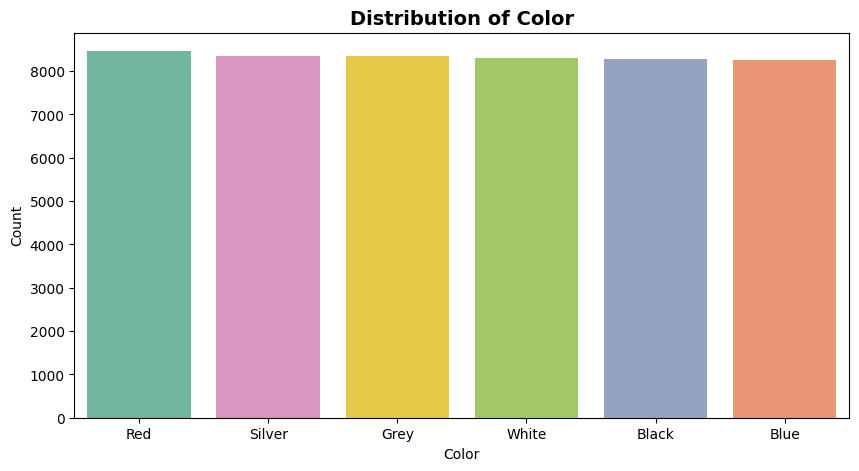

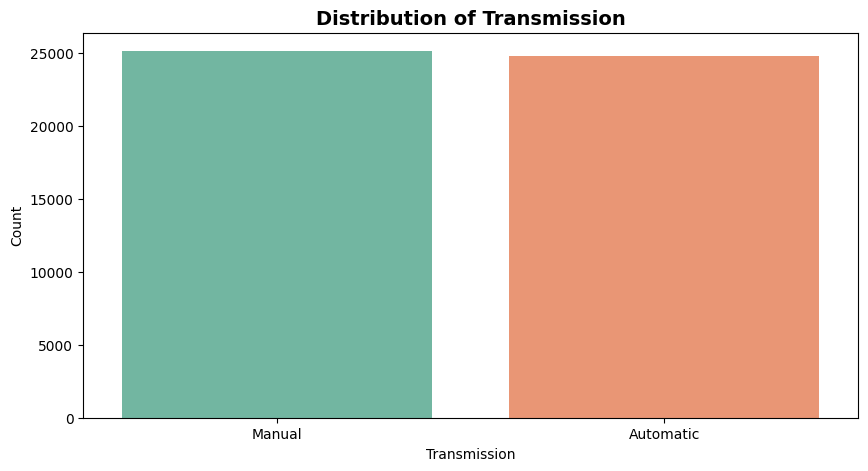

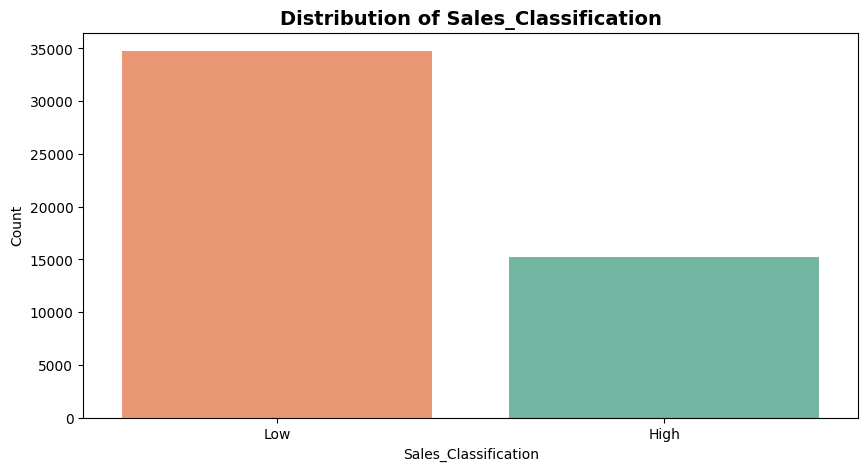

In [17]:
cat_col = ['Color','Transmission', 'Sales_Classification']

for col in cat_col:
    plt.figure(figsize=(10, 5))
    
    order = df[col].value_counts(ascending= False).index

    sns.countplot(
        data=df, 
        x=col,
        hue=col,
        order=order,
        palette='Set2'
    )

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Conclusion:

-The color preferences show that red is the most popular choice, followed by silver and grey, indicating a strong inclination toward bold or neutral tones. In contrast, black and blue are the least selected, suggesting lower demand for darker or more traditional colors. 
-Transmission preferences appear fairly balanced between manual and automatic, which indicates that BMW attracts a diverse customer base.
-Finally, the sales classification distribution shows a much higher count of low-classification sales compared to high, implying that the majority of BMW purchases fall into more affordable or lower-tier segments. This suggests that demand is strongest for entry-level or lower-priced BMW models, reflecting a broader customer base that prioritizes value while still seeking the BMW brand experience.
-Overall, the data points to customers favoring distinctive colors, maintaining mixed preferences for transmission types, and showing the strongest demand in lower-priced segments of the BMW lineup.

Fuel type distribution

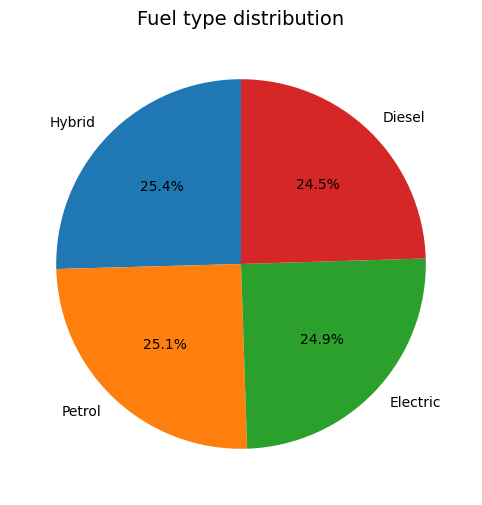

In [18]:
plt.figure(figsize=(10,6))

df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Fuel type distribution', fontsize= 14)
plt.ylabel('')
plt.show()

Conclusion
-The fuel type distribution shows a relatively balanced market, but with indications of shifting customer preferences. 
-Hybrid vehicles hold the highest share at 25.4%, suggesting growing interest in fuel efficient and environmentally friendly options. 
-Petrol follows closely at 25.1%, indicating that traditional combustion engines still maintain strong demand. 
-Electric vehicles sit at 24.9%, showing that fully electric models are nearly as popular as petrol and hybrid options, reflecting increasing acceptance of EV technology. Diesel has the lowest share at 24.5%, reinforcing the overall market trend away from diesel engines.

-Overall, the distribution suggests a gradual transition toward more sustainable fuel types, with hybrids currently leading and electric vehicles quickly catching up, while diesel demand continues to decline.